In [0]:
!pip install intel-numpy
!pip install intel-tensorflow
!pip install gensim --upgrade
!pip install keras --upgrade
!pip install pandas --upgrade

     |████████████████████████████████| 6.1MB 6.6MB/s 
     |████████████████████████████████| 235kB 30.9MB/s 
     |████████████████████████████████| 11.2MB 33.4MB/s 
     |████████████████████████████████| 399kB 48.7MB/s 
     |████████████████████████████████| 235kB 46.0MB/s 
     |████████████████████████████████| 901kB 40.9MB/s 
     |████████████████████████████████| 24.2MB 1.6MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.2.5)
     |████████████████████████████████| 10.5MB 6.6MB/s 
     |████████████████████████████████| 235kB 50.4MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.25.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: python-dateutil 2.5.3
    Un

In [0]:
!wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
!chmod +x Anaconda3-5.1.0-Linux-x86_64.sh
!bash ./Anaconda3-5.1.0-Linux-x86_64.sh -b -f -p /usr/local

In [0]:
!conda install -q -y --prefix /usr/local -c conda-forge tensorflow
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')

In [0]:
!conda install -q -y --prefix /usr/local -c intel daal4py
# import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')

In [0]:
import daal4py.sklearn
daal4py.sklearn.unpatch_sklearn()

In [0]:
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [0]:
from keras import backend as K

import tensorflow as tf

config = tf.ConfigProto(intra_op_parallelism_threads=2, inter_op_parallelism_threads=2, allow_soft_placement=True, device_count = {'CPU': 2 })

session = tf.Session(config=config)

K.set_session(session)

os.environ["OMP_NUM_THREADS"] = "2"

os.environ["KMP_BLOCKTIME"] = "30"

os.environ["KMP_SETTINGS"] = "1"

os.environ["KMP_AFFINITY"]= "granularity=fine,verbose,compact,1,0"

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# DATASET
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# %cd My Drive/intel_hackfury

In [0]:
!pwd

/content


In [0]:
# dataset_filename = os.listdir("../input")[0]
# dataset_path = os.path.join("..","input",dataset_filename)
# print("Open file:", dataset_path)
df = pd.read_csv('./drive/My Drive/intel_hackfury/training.1600000.processed.noemoticon.csv', encoding =DATASET_ENCODING , names=DATASET_COLUMNS)

In [0]:
df.head(5)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [0]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [0]:


%%time
df.target = df.target.apply(lambda x: decode_sentiment(x))



CPU times: user 573 ms, sys: 2.19 ms, total: 575 ms
Wall time: 581 ms


Text(0.5, 1.0, 'Dataset labels distribuition')

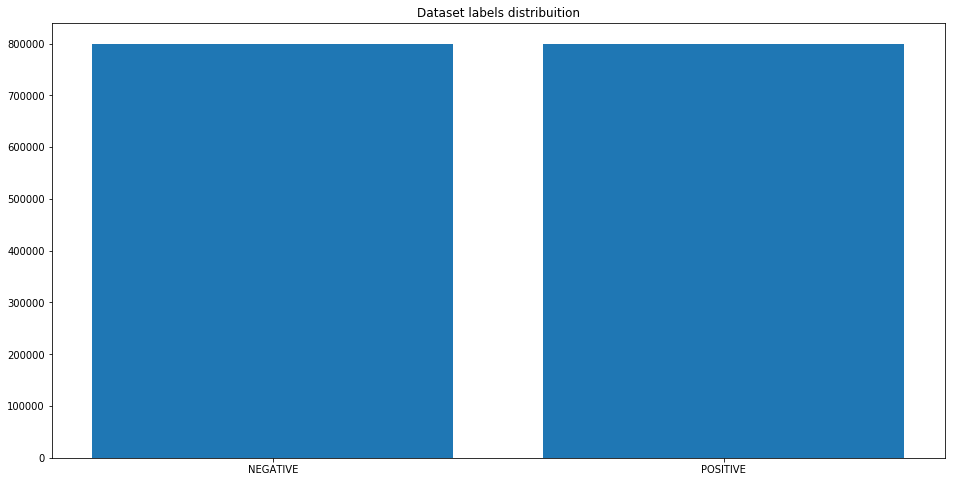

In [0]:
target_cnt = Counter(df.target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [0]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [0]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [0]:


%%time
df.text = df.text.apply(lambda x: preprocess(x))



CPU times: user 48.5 s, sys: 201 ms, total: 48.7 s
Wall time: 48.8 s


In [0]:
df_train, df_test = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 1280000
TEST size: 320000


In [0]:


%%time
documents = [_text.split() for _text in df_train.text] 



CPU times: user 2.74 s, sys: 319 ms, total: 3.06 s
Wall time: 3.07 s


In [0]:


w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)



In [0]:
w2v_model.build_vocab(documents)

2019-09-15 07:01:43,821 : INFO : collecting all words and their counts
2019-09-15 07:01:43,824 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-09-15 07:01:43,858 : INFO : PROGRESS: at sentence #10000, processed 72565 words, keeping 14005 word types
2019-09-15 07:01:43,881 : INFO : PROGRESS: at sentence #20000, processed 144393 words, keeping 21587 word types
2019-09-15 07:01:43,905 : INFO : PROGRESS: at sentence #30000, processed 215826 words, keeping 27541 word types
2019-09-15 07:01:43,928 : INFO : PROGRESS: at sentence #40000, processed 288271 words, keeping 32764 word types
2019-09-15 07:01:43,951 : INFO : PROGRESS: at sentence #50000, processed 359772 words, keeping 37587 word types
2019-09-15 07:01:43,975 : INFO : PROGRESS: at sentence #60000, processed 431431 words, keeping 42198 word types
2019-09-15 07:01:43,999 : INFO : PROGRESS: at sentence #70000, processed 503103 words, keeping 46458 word types
2019-09-15 07:01:44,021 : INFO : PROGRESS: at s

In [0]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

2019-09-15 07:02:07,999 : INFO : training model with 8 workers on 30369 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=7
2019-09-15 07:02:09,033 : INFO : EPOCH 1 - PROGRESS: at 3.80% examples, 308099 words/s, in_qsize 14, out_qsize 1
2019-09-15 07:02:10,084 : INFO : EPOCH 1 - PROGRESS: at 8.15% examples, 323811 words/s, in_qsize 15, out_qsize 0
2019-09-15 07:02:11,085 : INFO : EPOCH 1 - PROGRESS: at 12.60% examples, 337241 words/s, in_qsize 15, out_qsize 0
2019-09-15 07:02:12,098 : INFO : EPOCH 1 - PROGRESS: at 16.81% examples, 338648 words/s, in_qsize 16, out_qsize 0
2019-09-15 07:02:13,148 : INFO : EPOCH 1 - PROGRESS: at 21.03% examples, 337064 words/s, in_qsize 14, out_qsize 1
2019-09-15 07:02:14,160 : INFO : EPOCH 1 - PROGRESS: at 25.59% examples, 342502 words/s, in_qsize 15, out_qsize 0
2019-09-15 07:02:15,200 : INFO : EPOCH 1 - PROGRESS: at 29.80% examples, 341308 words/s, in_qsize 16, out_qsize 0
2019-09-15 07:02:16,239 : INFO : EPOCH 1 - PROGRESS: a

CPU times: user 24min 20s, sys: 4.95 s, total: 24min 25s
Wall time: 12min 30s


(263127043, 295270528)

In [0]:
w2v_model.most_similar("love")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2019-09-15 07:16:16,859 : INFO : precomputing L2-norms of word weight vectors


[('luv', 0.5715070962905884),
 ('loves', 0.5545152425765991),
 ('loved', 0.5482584238052368),
 ('amazing', 0.5128120183944702),
 ('adore', 0.4985947608947754),
 ('looove', 0.486950546503067),
 ('lovee', 0.4678725302219391),
 ('awesome', 0.454730361700058),
 ('loooove', 0.4387950897216797),
 ('loveee', 0.4365871250629425)]

In [0]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)


Total words 290419
CPU times: user 22.8 s, sys: 104 ms, total: 22.9 s
Wall time: 23 s


In [0]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [0]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen=SEQUENCE_LENGTH)

CPU times: user 32.3 s, sys: 624 ms, total: 32.9 s
Wall time: 33 s


In [0]:
labels = df_train.target.unique().tolist()
labels.append(NEUTRAL)
labels

['POSITIVE', 'NEGATIVE', 'NEUTRAL']

In [0]:
encoder = LabelEncoder()
encoder.fit(df_train.target.tolist())

y_train = encoder.transform(df_train.target.tolist())
y_test = encoder.transform(df_test.target.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (1280000, 1)
y_test (320000, 1)


In [0]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (1280000, 300)
y_train (1280000, 1)

x_test (320000, 300)
y_test (320000, 1)


In [0]:
y_train[:10]

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [0]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(290419, 300)


In [0]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

In [0]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 300)          87125700  
_________________________________________________________________
dropout_3 (Dropout)          (None, 300, 300)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 87,286,201
Trainable params: 160,501
Non-trainable params: 87,125,700
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [0]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [0]:
# tf.initialize_all_variables().run()

In [0]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=2,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Train on 1152000 samples, validate on 128000 samples
Epoch 1/2
1152000/1152000 [==============================] - 1017s 883us/step - loss: 0.5089 - acc: 0.7466 - val_loss: 0.4658 - val_acc: 0.7788
Epoch 2/2
1152000/1152000 [==============================] - 1012s 878us/step - loss: 0.4819 - acc: 0.7655 - val_loss: 0.4618 - val_acc: 0.7826
CPU times: user 35min 24s, sys: 4min 59s, total: 40min 23s
Wall time: 33min 50s


In [0]:


%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])



320000/320000 [==============================] - 110s 345us/step

ACCURACY: 0.78056875
LOSS: 0.46172088150978086
CPU times: user 1min 46s, sys: 10.5 s, total: 1min 56s
Wall time: 1min 50s


In [0]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = NEUTRAL
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [0]:
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  

In [0]:


predict("I am dead")



{'elapsed_time': 0.24833989143371582,
 'label': 'NEGATIVE',
 'score': 0.05974714457988739}

In [0]:
model.save('intel_weights.h5')

In [0]:
%ls

drive/  intel_weights.h5  sample_data/


In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'intel_weights.h5'})
uploaded.SetContentFile('intel_weights.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

2019-09-15 07:56:31,843 : WARNING : file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFo

Uploaded file with ID 1TFGD3cWP9FV4TYgE60dKtdrpjoSEfOK6


In [0]:
#testing model
model_test = load_model('intel_weights.h5')

In [0]:
def predict_test(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model_test.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}

In [0]:
predict_test('I am doing fine')

{'elapsed_time': 0.23649358749389648,
 'label': 'POSITIVE',
 'score': 0.8177458643913269}